### Intermagnet Plots

In [60]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime, timedelta
from scipy.signal import welch
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import re

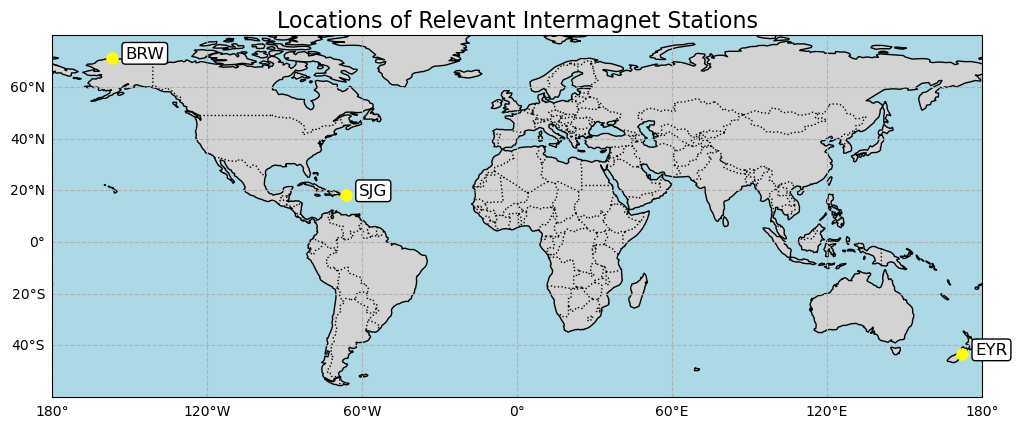

In [36]:
# Define coordinates: (longitude, latitude)
locations = [
    ("BRW", -156.62, 71.32),    # Barrow, Alaska
    ("SJG", -66.15, 18.11),    # San Juan, Puerto Rico
    ("EYR", 172.393, -43.474)  # Eyrewell, New Zealand
]

# Set up the global map with Plate Carrée projection
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.set_extent([-180, 180, -60, 80], crs=ccrs.PlateCarree())

# Add base map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle="--")
gl.top_labels = False
gl.right_labels = False

# Plot points and labels
for name, lon, lat in locations:
    ax.plot(lon, lat, marker='o', color='yellow', markersize=8, transform=ccrs.PlateCarree())
    ax.text(lon + 5, lat, name,
        transform=ccrs.PlateCarree(),
        fontsize=12,
        color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))


# Show the plot
plt.title("Locations of Relevant Intermagnet Stations", fontsize=16)
plt.show()

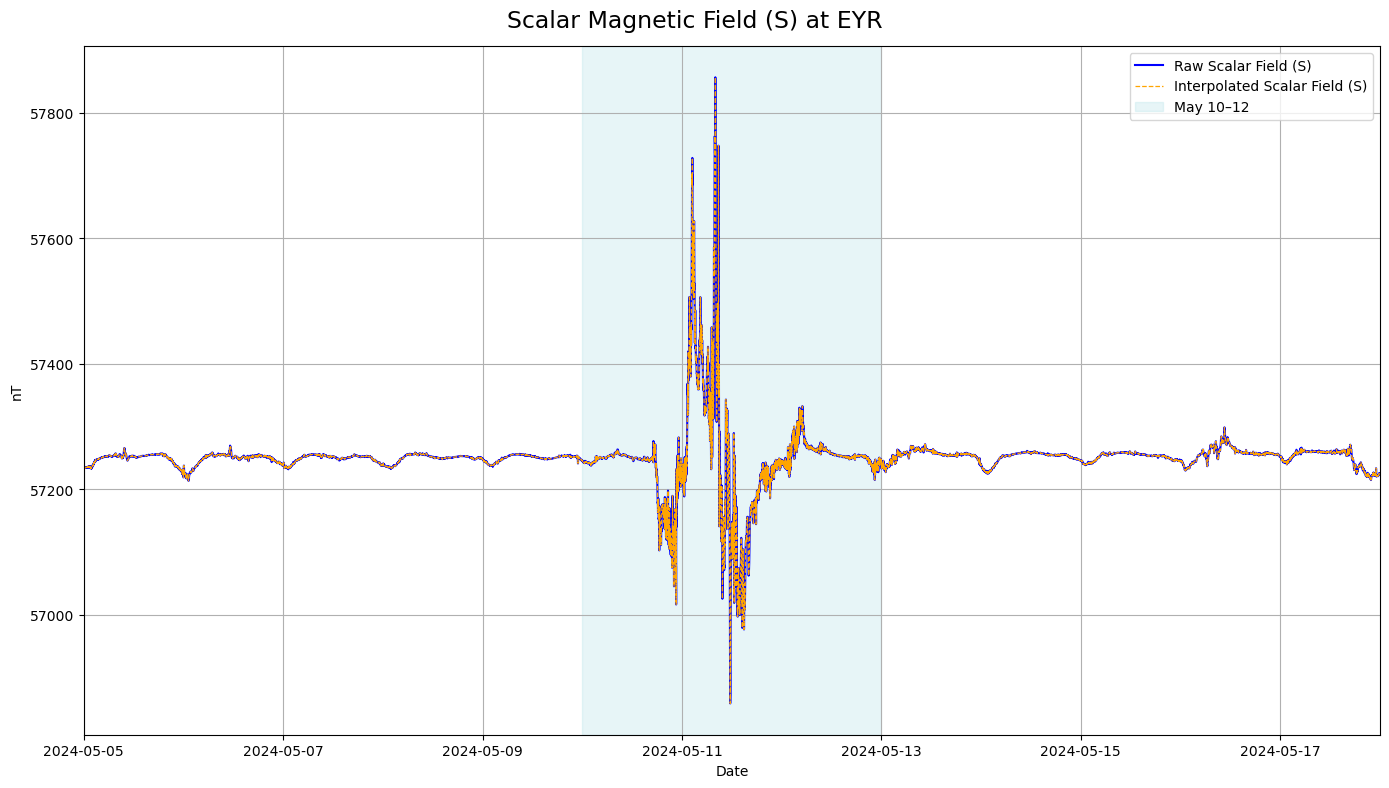

In [69]:
# Load the JSON data
with open("intermag-data/EYR20240503.json", "r") as f:
    raw_data = json.load(f)

# Extract relevant fields
times = [datetime.fromisoformat(t.replace("Z", "")) for t in raw_data["datetime"]]  # Convert datetime strings to datetime objects
S = np.array(raw_data["S"], dtype=float)  # Only take S

# Convert to pandas DataFrame for easier handling
df_EYR = pd.DataFrame({
    'time': times,
    'S': S,
})

# Set the time as the index
df_EYR.set_index('time', inplace=True)

# Interpolate missing (NaN) values using linear interpolation
df_EYR_inter = df_EYR.interpolate(method='linear', axis=0)

# Plot the scalar field strength (S)
plt.figure(figsize=(14, 8))

# Raw Scalar field (S)
plt.plot(times, S, label='Raw Scalar Field (S)', color='blue')
plt.plot(df_EYR_inter.index, df_EYR_inter['S'], label='Interpolated Scalar Field (S)', color='orange', linestyle='--', linewidth=0.9)

plt.ylabel('nT')
plt.xlim(datetime(2024, 5, 5), datetime(2024, 5, 18))

# Highlight May 10 to May 12
start_highlight = pd.to_datetime('2024-05-10')
end_highlight = pd.to_datetime('2024-05-12 23:59:59')
plt.axvspan(start_highlight, end_highlight, color='powderblue', alpha=0.3, label='May 10–12')

plt.legend()
plt.grid(True)
plt.xlabel('Date')
plt.suptitle("Scalar Magnetic Field (S) at EYR", fontsize=17)
plt.tight_layout()
plt.show()

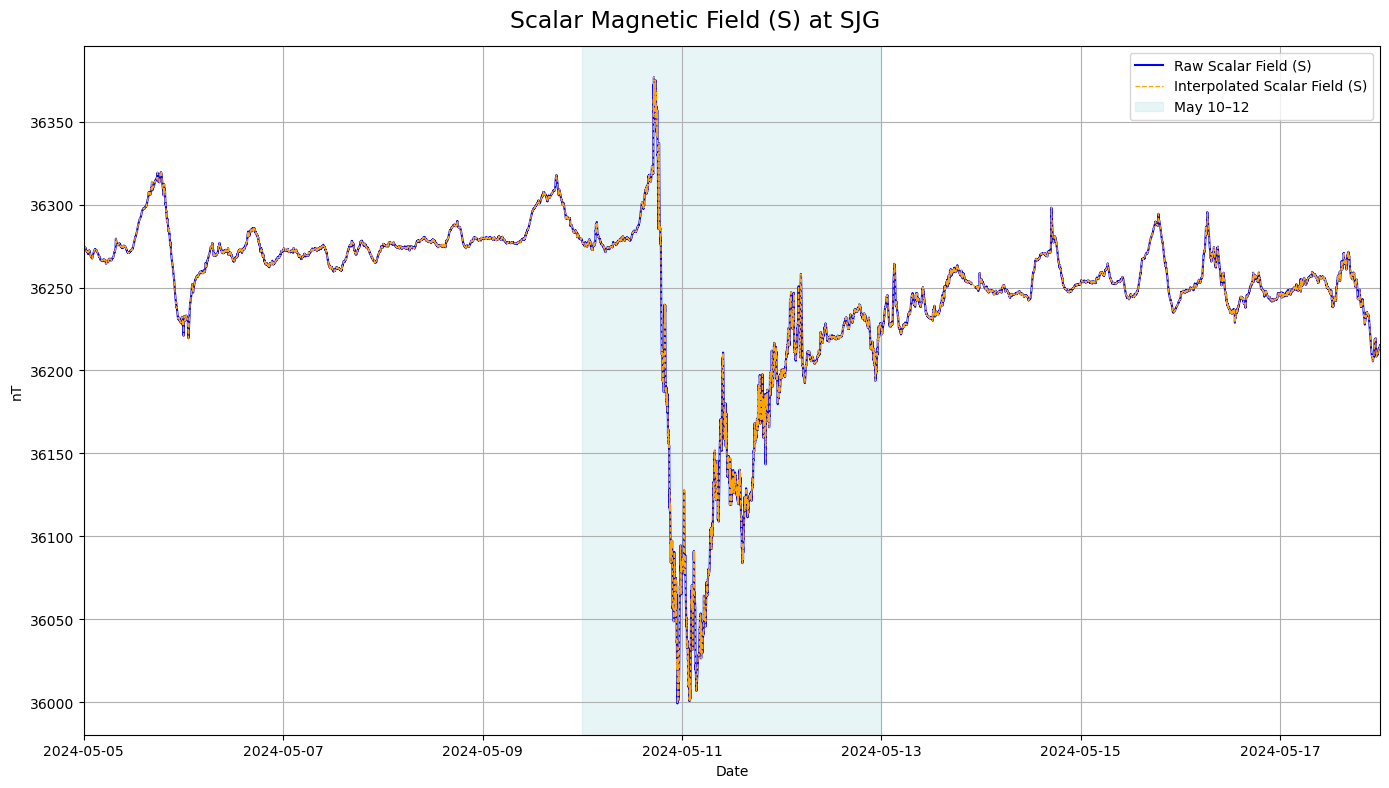

In [70]:
# Load the JSON data
with open("intermag-data/SJG20240503.json", "r") as f:
    raw_data = json.load(f)

# Extract relevant fields
times = [datetime.fromisoformat(t.replace("Z", "")) for t in raw_data["datetime"]]  # Convert datetime strings to datetime objects
S = np.array(raw_data["S"], dtype=float)


# Convert to pandas DataFrame for easier handling
df_SJG = pd.DataFrame({
    'time': times,
    'S': S,
})

# Set the time as the index
df_SJG.set_index('time', inplace=True)

# Interpolate missing (NaN) values using linear interpolation
df_SJG_inter = df_SJG.interpolate(method='linear', axis=0)

# Plot the scalar field strength (S)
plt.figure(figsize=(14, 8))

# Raw Scalar field (S)
plt.plot(times, S, label='Raw Scalar Field (S)', color='blue')
plt.plot(df_SJG_inter.index, df_SJG_inter['S'], label='Interpolated Scalar Field (S)', color='orange', linestyle='--', linewidth=0.9)

plt.ylabel('nT')
plt.xlim(datetime(2024, 5, 5), datetime(2024, 5, 18))

# Highlight May 10 to May 12
start_highlight = pd.to_datetime('2024-05-10')
end_highlight = pd.to_datetime('2024-05-12 23:59:59')
plt.axvspan(start_highlight, end_highlight, color='powderblue', alpha=0.3, label='May 10–12')

plt.legend()
plt.grid(True)
plt.xlabel('Date')
plt.suptitle("Scalar Magnetic Field (S) at SJG", fontsize=17)
plt.tight_layout()
plt.show()

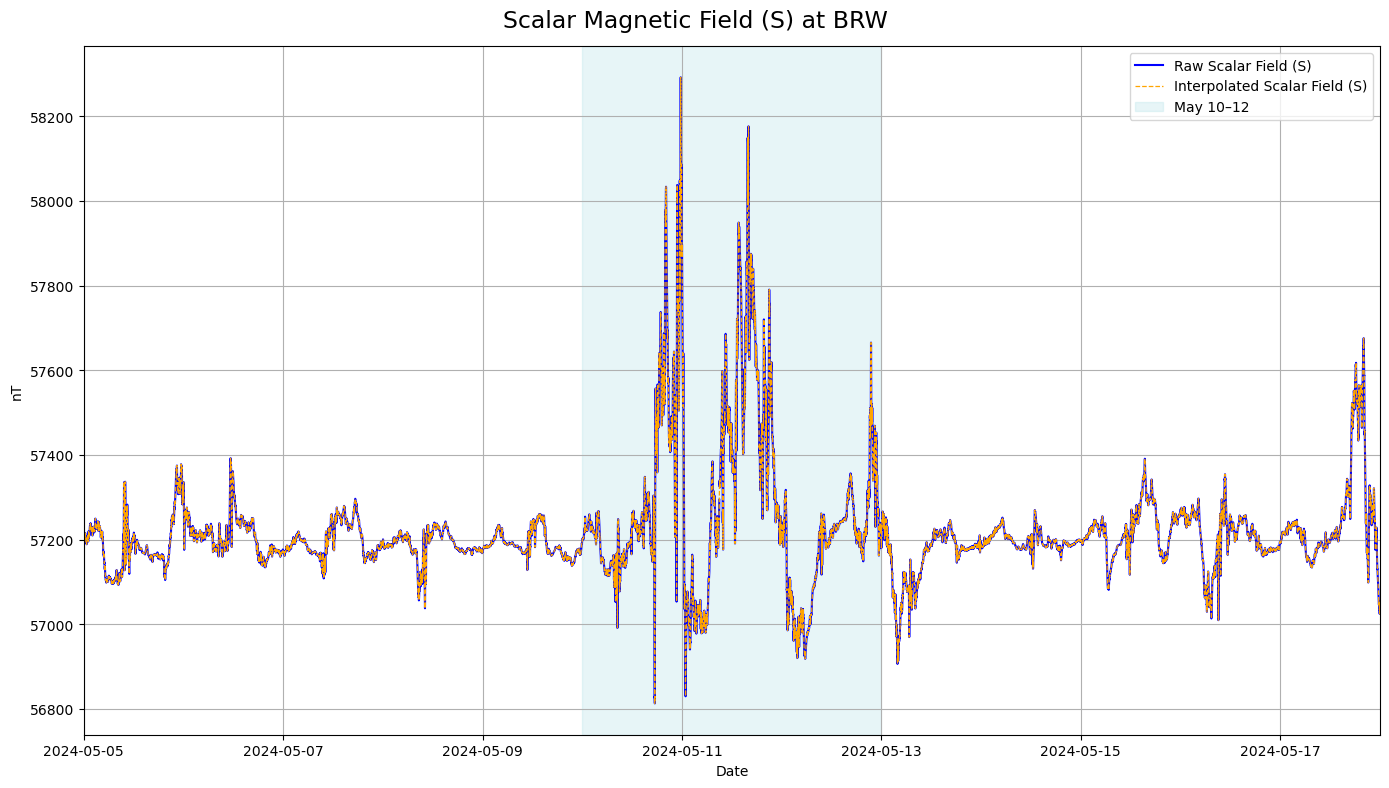

In [71]:
# Load the JSON data
with open("intermag-data/BRW20240503.json", "r") as f:
    raw_data = json.load(f)

# Extract relevant fields
times = [datetime.fromisoformat(t.replace("Z", "")) for t in raw_data["datetime"]]  # Convert datetime strings to datetime objects
S = np.array(raw_data["S"], dtype=float)


# Convert to pandas DataFrame for easier handling
df_BRW = pd.DataFrame({
    'time': times,
    'S': S,
})

# Set the time as the index
df_BRW.set_index('time', inplace=True)

# Interpolate missing (NaN) values using linear interpolation
df_BRW_inter = df_BRW.interpolate(method='linear', axis=0)

# Plot the scalar field strength (S)
plt.figure(figsize=(14, 8))

# Raw Scalar field (S)
plt.plot(times, S, label='Raw Scalar Field (S)', color='blue')
plt.plot(df_BRW_inter.index, df_BRW_inter['S'], label='Interpolated Scalar Field (S)', color='orange', linestyle='--', linewidth=0.9)

plt.ylabel('nT')
plt.xlim(datetime(2024, 5, 5), datetime(2024, 5, 18))

# Highlight May 10 to May 12
start_highlight = pd.to_datetime('2024-05-10')
end_highlight = pd.to_datetime('2024-05-12 23:59:59')
plt.axvspan(start_highlight, end_highlight, color='powderblue', alpha=0.3, label='May 10–12')

plt.legend()
plt.grid(True)
plt.xlabel('Date')
plt.suptitle("Scalar Magnetic Field (S) at BRW", fontsize=17)
plt.tight_layout()
plt.show()

### GOES Data Plots

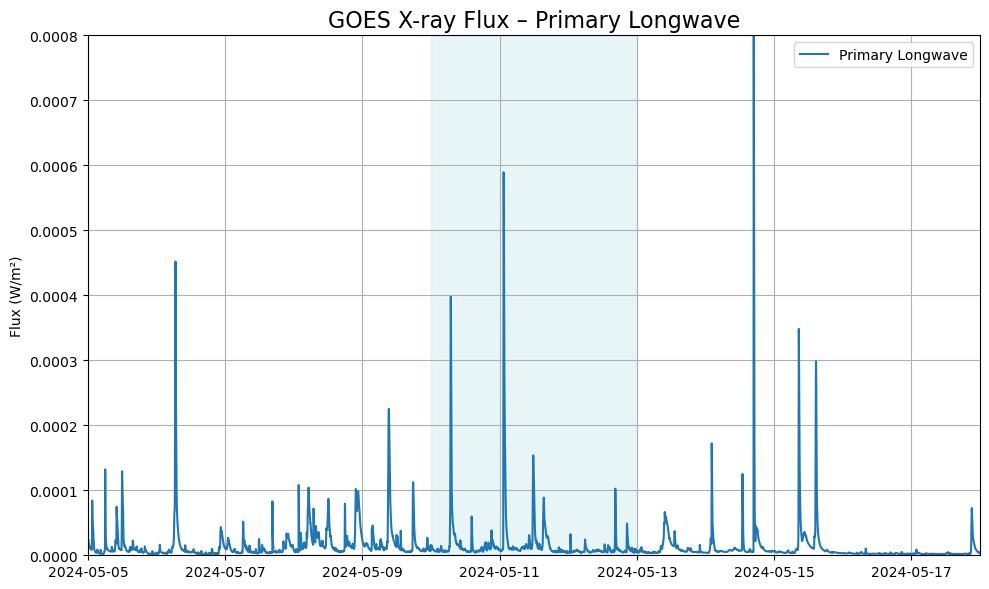

In [77]:
# Load the data
df1 = pd.read_csv('misc-data/goes-x-ray-flux.csv')

# Clean column names (remove double spaces)
df1.columns = [col.strip().replace('  ', ' ') for col in df1.columns]

# Convert time column to datetime
df1['Universal Time'] = pd.to_datetime(df1['Universal Time'])

# Set time as the index
df1.set_index('Universal Time', inplace=True)

# Define time window to highlight
start_highlight = pd.to_datetime('2024-05-10')
end_highlight = pd.to_datetime('2024-05-12 23:59:59')

# Define date limits
xlim_start = datetime(2024, 5, 5)
xlim_end = datetime(2024, 5, 18)

# Create one plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot primary waves
ax.plot(df1.index, df1['GOES primary Longwave'], label='Primary Longwave', linewidth=1.5)

# Highlight region
ax.axvspan(start_highlight, end_highlight, color='powderblue', alpha=0.3)

# Set axis limits and labels
ax.set_xlim(xlim_start, xlim_end)
ax.set_ylim(0, 0.0008)
ax.set_ylabel('Flux (W/m²)')
ax.set_title('GOES X-ray Flux – Primary Longwave', fontsize=16)
ax.legend()
ax.grid(True)

# Improve layout and show
plt.tight_layout()
plt.show()


### Dst Plot

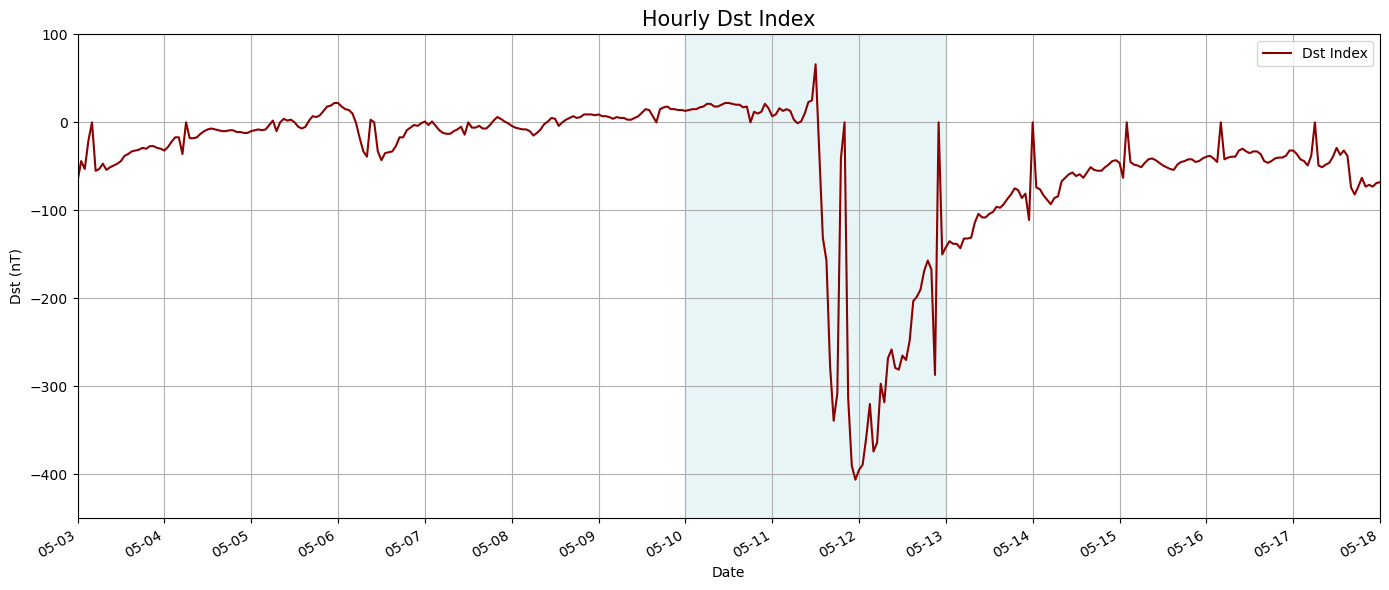

In [56]:
# Read and parse dst values
dst_values = []
with open("misc-data/dst2405.for.request", 'r') as file:
    for line in file:
        numbers = re.findall(r'[-+]?\d+', line[16:])
        dst_values.extend(map(int, numbers))

# Create hourly timestamps for May 2024
start_time = datetime(2024, 5, 1)
time_index = pd.date_range(start=start_time, periods=len(dst_values), freq='h')

fig, ax = plt.subplots(figsize=(14, 6))

# Plot manually for full control
ax.plot(dst_series.index, dst_series.values, linestyle='-', color='darkred', label='Dst Index')

# Formatting
ax.set_title("Hourly Dst Index", fontsize=15)
ax.set_xlabel("Date")
ax.set_ylabel("Dst (nT)")
ax.set_xlim(datetime(2024, 5, 3), datetime(2024, 5, 18))
ax.set_ylim(-450, 100)

# Only show one tick per day
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Highlight storm period
ax.axvspan(start_highlight, end_highlight, color='powderblue', alpha=0.3)

ax.grid(True)
ax.legend()
fig.autofmt_xdate()  # Neatens date labels
plt.tight_layout()
plt.show()

### Statistical Analysis